# Food demand on Nigeria
Population of interest: young population  
Possibly compare between social class

In [1]:
!pip install -r requirements.txt

In [2]:
!pip install python-dateutil

In [3]:
from eep153_tools.sheets import read_sheets
import numpy as np
import pandas as pd

def get_clean_sheet(key,sheet=None):

    df = read_sheets(key,sheet=sheet)
    df.columns = [c.strip() for c in df.columns.tolist()]

    df = df.loc[:,~df.columns.duplicated(keep='first')]   

    df = df.drop([col for col in df.columns if col.startswith('Unnamed')], axis=1)

    df = df.loc[~df.index.duplicated(), :]

    return df

In [4]:
#load datset
consumption_ownprod = pd.read_excel('Nigeria LSMS Consumption from Own Production.xlsx')
consumption = pd.read_excel('Nigeria LSMS Consumption.xlsx')
expenditures = pd.read_excel('Nigeria LSMS.xlsx',sheet_name='Expenditures')
hh_characteristics = pd.read_excel('Nigeria LSMS.xlsx',sheet_name='HH Characteristics')
fct = pd.read_excel('WAFCT_2019.xlsx', sheet_name='05 NV_sum_57 (per 100g EP)')

## Estimation Example

### Data

In [5]:
#household characteristics
hh_characteristics.columns.name = 'k'
hh_characteristics.set_index(['i','t','m'],inplace=True)

#expenditure
expenditures.columns.name = 'j'

expenditures = expenditures.groupby('j',axis=1).sum()
expenditures = expenditures.replace(0,np.nan)
expenditures1 = np.log(expenditures.set_index(['i','t','m']))

#consumption
if 'm' not in consumption.columns:
    consumption['m'] = 1

consumption = consumption.set_index(['i','t','m','u'])
consumption.columns.name = 'k'

consumption = consumption.apply(lambda x: pd.to_numeric(x,errors='coerce'))
consumption = consumption.replace(0,np.nan)

In [6]:
#fct
fct.index.name = 'i'

fct = fct.apply(lambda x: pd.to_numeric(x,errors='coerce'))

#RDI
rdi = get_clean_sheet('1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ',
                    sheet='RDI')
rdi = rdi.set_index('n')
rdi.columns.name = 'k'

Key available for students@eep153.iam.gserviceaccount.com.


In [7]:
consumption

k                                          (Cocoyam, Spinach, etc)  \
i        t      m       u                                            
10001.0  2010.0 Nigeria Kilograms                              NaN   
                        Litres                                 NaN   
10002.0  2010.0 Nigeria Kilograms                              NaN   
                        Litres                                 NaN   
10003.0  2010.0 Nigeria Kilograms                              NaN   
...                                                            ...   
379151.0 2018.0 Nigeria 3. LITRES (L)                          NaN   
379154.0 2018.0 Nigeria 1. KILOGRAMS (KG)                      NaN   
379155.0 2018.0 Nigeria 1. KILOGRAMS (KG)                      NaN   
NaN      NaN    Nigeria NaN                                    NaN   
                        NaN                                    NaN   

k                                          Agricultural eggs  Animal fat  \
i        t      m       u                                                  
10001.0  2010.0 Nigeria Kilograms                       0.89         NaN   
                        Litres                           NaN         NaN   
10002.0  2010.0 Nigeria Kilograms                       0.89         NaN   
                        Litres                           NaN         NaN   
10003.0  2010.0 Nigeria Kilograms                       0.44         NaN   
...                                                      ...         ...   
379151.0 2018.0 Nigeria 3. LITRES (L)                    NaN         NaN   
379154.0 2018.0 Nigeria 1. KILOGRAMS (KG)                NaN         NaN   
379155.0 2018.0 Nigeria 1. KILOGRAMS (KG)                NaN         NaN   
NaN      NaN    Nigeria NaN                              NaN         NaN   
                        NaN                              NaN         NaN   

k                                          Apples  Avocado pear  \
i        t      m       u                                         
10001.0  2010.0 Nigeria Kilograms             NaN           NaN   
                        Litres                NaN           NaN   
10002.0  2010.0 Nigeria Kilograms             NaN           NaN   
                        Litres                NaN           NaN   
10003.0  2010.0 Nigeria Kilograms             NaN           NaN   
...                                           ...           ...   
379151.0 2018.0 Nigeria 3. LITRES (L)         NaN           NaN   
379154.0 2018.0 Nigeria 1. KILOGRAMS (KG)     NaN           NaN   
379155.0 2018.0 Nigeria 1. KILOGRAMS (KG)     NaN           NaN   
NaN      NaN    Nigeria NaN                   NaN           NaN   
                        NaN                   NaN           NaN   

k                                          Baby milk powder  Bananas  Beef  \
i        t      m       u                                                    
10001.0  2010.0 Nigeria Kilograms                       NaN     1.30   1.0   
                        Litres                          NaN      NaN   NaN   
10002.0  2010.0 Nigeria Kilograms                       NaN     1.30   2.0   
                        Litres                          NaN      NaN   NaN   
10003.0  2010.0 Nigeria Kilograms                       NaN     0.35   0.3   
...                                                     ...      ...   ...   
379151.0 2018.0 Nigeria 3. LITRES (L)                   NaN      NaN   NaN   
379154.0 2018.0 Nigeria 1. KILOGRAMS (KG)               NaN      NaN   1.0   
379155.0 2018.0 Nigeria 1. KILOGRAMS (KG)               NaN      NaN   1.0   
NaN      NaN    Nigeria NaN                             NaN      NaN   NaN   
                        NaN                             NaN      NaN   NaN   

k                                          Beer (local and imported)  \
i        t      m       u                                              
10001.0  2010.0 Nigeria Kilograms                                NaN 

In [8]:
hh_characteristics

,,k,M 00-03,M 04-08,M 09-13,M 14-18,M 19-30,M 31-50,M 51+,F 00-03,F 04-08,F 09-13,F 14-18,F 19-30,F 31-50,F 51+
i,t,m,,,,,,,,,,,,,,
10001,2010,Nigeria,0,0,0,0,1,2,0,1,0,0,0,1,2,0
10002,2010,Nigeria,0,0,1,1,1,1,0,0,0,0,0,2,1,0
10003,2010,Nigeria,0,1,1,1,0,0,1,0,0,1,0,0,1,0
10004,2010,Nigeria,0,0,1,0,0,0,1,0,0,0,0,0,0,1
10006,2010,Nigeria,0,0,0,0,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379146,2018,Nigeria,0,0,0,0,1,1,1,0,0,0,0,0,0,1
379148,2018,Nigeria,0,0,0,0,1,0,0,0,0,0,0,0,0,0
379151,2018,Nigeria,0,0,2,0,0,0,1,0,0,0,1,0,1,0


In [9]:
expenditures1

,,j,"(Cocoyam, Spinach, etc)",Agricultural eggs,Animal fat,Apples,Avocado pear,Baby milk powder,Bananas,Beef,Beer (local and imported),Biscuits,...,Sweet Potatoes,Tea,Tomato puree(canned),Tomatoes,Watermelon,Wheat flour,White beans,Wild game meat,Yam flour,Yam-roots
i,t,m,,,,,,,,,,,,,,,,,,,,,
10001,2010,Nigeria,NaN,5.634790,NaN,NaN,NaN,NaN,5.298317,6.214608,6.291569,NaN,...,5.010635,NaN,5.010635,5.010635,NaN,NaN,6.396930,NaN,NaN,7.313220
10002,2010,Nigeria,NaN,5.634790,NaN,NaN,NaN,NaN,5.192957,7.090077,7.600902,NaN,...,5.298317,4.941642,5.480639,4.787492,NaN,NaN,5.991465,NaN,NaN,7.090077
10003,2010,Nigeria,NaN,5.192957,NaN,NaN,NaN,NaN,4.605170,6.214608,NaN,NaN,...,5.298317,4.094345,4.499810,4.605170,NaN,NaN,4.605170,NaN,NaN,5.991465
10004,2010,Nigeria,NaN,5.192957,NaN,NaN,NaN,NaN,4.605170,6.214608,NaN,NaN,...,NaN,3.401197,4.094345,4.605170,NaN,NaN,4.605170,NaN,NaN,5.991465
10006,2010,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,5.703782,5.703782,NaN,NaN,...,NaN,6.476972,NaN,5.991465,NaN,NaN,NaN,NaN,NaN,5.991465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379146,2018,Nigeria,NaN,7.003065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.214608,NaN,NaN,NaN,NaN,7.495542
379148,2018,Nigeria,4.605170,NaN,NaN,NaN,NaN,NaN,NaN,6.551080,NaN,NaN,...,NaN,NaN,4.094345,5.298317,5.010635,NaN,NaN,NaN,NaN,7.377759
379151,2018,Nigeria,NaN,6.802395,NaN,NaN,NaN,NaN,6.214608,NaN,NaN,NaN,...,NaN,NaN,5.010635,6.396930,6.396930,6.620073,7.377759,NaN,NaN,8.160518


In [10]:
rdi

k,F 00-03,M 00-03,F 04-08,M 04-08,F 09-13,M 09-13,F 14-18,M 14-18,F 19-30,M 19-30,F 31-50,M 31-50,F 51+,M 51+
n,,,,,,,,,,,,,,
Energy,1000.0,1000.0,1200.0,1400.0,1600.0,1800.0,1800.0,2200.0,2000.0,2400.0,1800.0,2200.0,1600.0,2000.0
Protein,13.0,13.0,19.0,19.0,34.0,34.0,46.0,52.0,46.0,56.0,46.0,56.0,46.0,56.0
Fiber,14.0,14.0,16.8,19.6,22.4,25.2,25.2,30.8,28.0,33.6,25.2,30.8,22.4,28.0
Folate,150.0,150.0,200.0,200.0,300.0,300.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
Calcium,700.0,700.0,1000.0,1000.0,1300.0,1300.0,1300.0,1300.0,1000.0,1000.0,1000.0,1000.0,1200.0,1000.0
Carbohydrate,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0
Iron,7.0,7.0,10.0,10.0,8.0,8.0,15.0,11.0,18.0,8.0,18.0,8.0,8.0,8.0
Magnesium,80.0,80.0,130.0,130.0,240.0,240.0,360.0,410.0,310.0,400.0,320.0,420.0,320.0,420.0
Niacin,6.0,6.0,8.0,8.0,12.0,12.0,14.0,16.0,14.0,16.0,14.0,16.0,14.0,16.0


y = expenditures1  
d = hh_characteristics

#### Drop food that few people consume

In [11]:
from cfe.estimation import drop_columns_wo_covariance

expenditures1 = drop_columns_wo_covariance(expenditures1,min_obs=30)

Missing dependencies for OracleDemands.


In [12]:
use = expenditures1.index.intersection(hh_characteristics.index)
expenditures1 = expenditures1.loc[use,:]
hh_characteristics = hh_characteristics.loc[use,:]

In [13]:
expenditures1 #drop half

,,j,"(Cocoyam, Spinach, etc)",Agricultural eggs,Bananas,Beef,Biscuits,Bread,Brown beans,Cassava flour,Chicken,Chocolate drinks,...,"Soft drinks (Coca cola, spirit etc)",Sugar,Sweet Potatoes,Tea,Tomato puree(canned),Tomatoes,Watermelon,Wheat flour,White beans,Yam-roots
i,t,m,,,,,,,,,,,,,,,,,,,,,
10001,2010,Nigeria,NaN,5.634790,5.298317,6.214608,NaN,6.620073,NaN,NaN,7.244228,6.309918,...,5.010635,5.298317,5.010635,NaN,5.010635,5.010635,NaN,NaN,6.396930,7.313220
10002,2010,Nigeria,NaN,5.634790,5.192957,7.090077,NaN,6.109248,NaN,NaN,7.649693,5.857933,...,6.802395,5.298317,5.298317,4.941642,5.480639,4.787492,NaN,NaN,5.991465,7.090077
10003,2010,Nigeria,NaN,5.192957,4.605170,6.214608,NaN,5.298317,NaN,NaN,NaN,NaN,...,NaN,3.401197,5.298317,4.094345,4.499810,4.605170,NaN,NaN,4.605170,5.991465
10004,2010,Nigeria,NaN,5.192957,4.605170,6.214608,NaN,4.787492,NaN,NaN,NaN,NaN,...,NaN,3.688879,NaN,3.401197,4.094345,4.605170,NaN,NaN,4.605170,5.991465
10006,2010,Nigeria,NaN,NaN,5.703782,5.703782,NaN,5.010635,5.192957,NaN,NaN,NaN,...,NaN,2.302585,NaN,6.476972,NaN,5.991465,NaN,NaN,NaN,5.991465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379146,2018,Nigeria,NaN,7.003065,NaN,NaN,NaN,6.684612,7.408531,5.703782,NaN,6.684612,...,7.600902,NaN,NaN,NaN,NaN,NaN,6.214608,NaN,NaN,7.495542
379148,2018,Nigeria,4.605170,NaN,NaN,6.551080,NaN,5.521461,6.309918,NaN,NaN,6.109248,...,NaN,NaN,NaN,NaN,4.094345,5.298317,5.010635,NaN,NaN,7.377759
379151,2018,Nigeria,NaN,6.802395,6.214608,NaN,NaN,6.109248,NaN,NaN,8.006368,6.109248,...,NaN,4.605170,NaN,NaN,5.010635,6.396930,6.396930,6.620073,7.377759,8.160518


In [14]:
use = expenditures1.index.intersection(hh_characteristics.index)
expenditures1 = expenditures1.loc[use,:]
hh_characteristics = hh_characteristics.loc[use,:]

### Estimation

In [15]:
expenditures2 = expenditures1.stack()
hh_characteristics1 = hh_characteristics.stack()

assert expenditures2.index.names == ['i','t','m','j']
assert hh_characteristics1.index.names == ['i','t','m','k']

#### Basic Estimation

In [16]:
from cfe import Regression

result = Regression(y=expenditures2,d=hh_characteristics1)

In [17]:
result.predicted_expenditures()

i       t     m        j                      
10001   2010  Nigeria  (Cocoyam, Spinach, etc)     156.909249
                       Agricultural eggs           397.586147
                       Bananas                     265.637209
                       Beef                       1000.482019
                       Bread                       394.467437
                                                     ...     
379155  2018  Nigeria  Tomato puree(canned)        269.917715
                       Tomatoes                    308.927296
                       Wheat flour                 855.235718
                       White beans                 881.728278
                       Yam-roots                  1251.744786
Length: 708167, dtype: float64

<IPython.core.display.Javascript object>


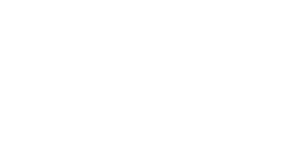

In [18]:
%matplotlib notebook
import matplotlib.pyplot as plt
df = pd.DataFrame({'y':expenditures2,'yhat':result.get_predicted_log_expenditures()})
df.plot.scatter(x='yhat',y='y')

v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax], color = 'purple')

### Parameter  
• Beta parameter: income elasticity

In [19]:
result.get_beta().sort_values()

j
Fish-Frozen                             0.246842
Other vegetables (fresh or canned)      0.253198
Garden eggs/egg plant                   0.257859
Okra-fresh                              0.295308
Pineapples                              0.295379
(Cocoyam, Spinach, etc)                 0.305324
Chicken                                 0.318017
Cassava flour                           0.321077
Goat                                    0.324849
Gari -Yellow                            0.326250
Milk tinned (unsweetened)               0.335286
Plantains                               0.336689
Okra-dried                              0.341528
Tomatoes                                0.341543
Beef                                    0.341884
Palm oil                                0.343210
Soft drinks (Coca cola, spirit etc)     0.343263
Yam-roots                               0.347992
Tomato puree(canned)                    0.352777
Orange/tangerine                        0.361425
Brown beans       

<IPython.core.display.Javascript object>


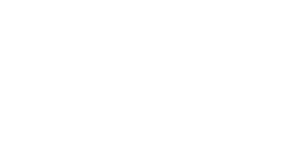

<IPython.core.display.Javascript object>


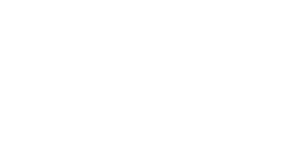

In [20]:
result.graph_beta()

#### Demand and Household Composition  
• Impact of household member on consumption of food

In [21]:
result.gamma

k,M 00-03,M 04-08,M 09-13,M 14-18,M 19-30,M 31-50,M 51+,F 00-03,F 04-08,F 09-13,F 14-18,F 19-30,F 31-50,F 51+,Constant
j,,,,,,,,,,,,,,,
"(Cocoyam, Spinach, etc)",-0.015192,0.012283,0.030412,-0.033765,0.048779,0.057815,0.101008,0.031863,0.028920,0.033931,0.048556,0.050374,0.070528,0.031611,-0.197808
Agricultural eggs,0.005273,0.047350,0.050232,0.015530,0.089903,0.219877,0.182996,0.053201,0.053745,0.019356,0.028243,0.094256,0.103635,-0.060144,-0.474118
Bananas,0.037509,0.019628,0.046346,0.056714,0.095653,0.124172,0.082554,0.023702,0.009165,0.050533,0.077732,0.056040,0.068480,-0.002241,-0.357297
Beef,0.035403,0.045631,0.032596,0.059631,0.084576,0.156356,0.147275,0.008473,0.033471,0.044356,0.055734,0.099305,0.059286,-0.004953,-0.434315
Bread,0.019121,0.050941,0.031611,0.056330,0.102693,0.172484,0.140703,0.016710,0.046773,0.063223,0.072251,0.102843,0.096053,0.017779,-0.442452
Brown beans,0.041103,0.073306,0.049682,0.065975,0.070143,0.130769,0.110357,0.041433,0.026002,0.061614,0.090390,0.073097,0.110112,0.060538,-0.388814
Cassava flour,0.003404,0.100233,0.033744,0.085940,0.066803,0.088818,0.074925,-0.067421,0.068931,-0.010453,0.085130,0.052734,0.093547,0.013511,-0.296914
Chicken,-0.007596,0.033497,-0.014040,0.032923,0.082972,0.133768,0.161904,-0.062432,0.011918,0.011559,0.042921,0.103479,0.126613,-0.005463,-0.526734
Chocolate drinks,0.067683,0.016802,0.045409,0.003374,0.071992,0.145705,0.183903,0.076143,0.037072,0.028193,0.077367,0.131429,0.080670,-0.002316,-0.368023


In [22]:
#Save result
result.to_pickle('my_estimates.pickle')

import cfe
result = cfe.regression.read_pickle('my_estimates.pickle')

### Nutritional content of different foods
Here we collected the nutritional contents of 42 types of foods in regression analysis.

In [23]:
food_codes = pd.read_excel('Food Codes for Nigeria.xlsx')

In [24]:
food_codes

,Food description,From Country,FDC Comments,COICOP,COICOP Comments,USDA FDC ID,WAFCT ID,WAFCT Comments
0,Guinea corn/sorghum,NGA,"""Sorghum grain""",01.1.1.1.3,NaN,169716,01_039,NaN
1,Millet,NGA,"""Cooked millet""",01.1.1.1.5,NaN,168871,01_017,NaN
2,Maize,NGA,WHOLE KERNEL CORN MAIZE,01.1.1.1.6,NaN,1441697,01_004,NaN
3,Rice-local,NGA,"Rice, white, long-grain, regular, unenriched, ...",01.1.1.1.2,NaN,169757,01_065,NaN
4,Rice-Imported,NGA,"Rice, white, long-grain, regular, unenriched, ...",01.1.1.1.2,NaN,169757,01_037,NaN
...,...,...,...,...,...,...,...,...
91,Beer (local and imported),NGA,Beer,02.1.3.0,NaN,1104393,12_001,NaN
92,Palm wine,NGA,"Alcoholic beverage, wine, table, all",02.1.2.2,Wine from other sources (ND),173185,12_006,NaN
93,Pito,NGA,Beer,02.1.3.0,Beer,1104393,12_003,NaN
94,Gin,NGA,Gin,02.1.9.0,Other alcoholic beverages,1104487,NaN,None


In [25]:
fc = result.get_beta().to_frame()
table = food_codes.loc[:, ['Food description', 'USDA FDC ID']]

In [26]:
fc_table = fc.merge(table, left_on = 'j', right_on = 'Food description', how = 'inner')

In [27]:
fc_table

,beta,Food description,USDA FDC ID
0,0.679675,"(Cocoyam, Spinach, etc)",1320589
1,1.215686,Agricultural eggs,747997
2,0.854099,Bananas,1102653
3,0.761059,Beef,1098212
4,0.848466,Bread,325871
5,0.828217,Brown beans,747433
6,0.714741,Cassava flour,2505943
7,0.707930,Chicken,171116
8,1.353846,Chocolate drinks,1097616
9,0.954389,"Condiments,(salt,spices,pepper, etc)",1257188


In [28]:
apikey = "lxD6lWLfAtFMmMogo98BZyZakAnjLIADqzEbiTjs" 

In [29]:
!pip install fooddatacentral

In [30]:
import warnings
import fooddatacentral as fdc

D = {}
count = 0
for food in fc.index:
    try:
        FDC = fc_table.loc[fc_table['Food description']==food,'USDA FDC ID'].values[0]
        count+=1
        D[food] = fdc.nutrients(apikey,FDC).Quantity
        print(food)
    except AttributeError:
        warnings.warn(f"Couldn't find FDC Code {FDC} for food {food}." % (food,FDC))

D = pd.DataFrame(D,dtype=float)


(Cocoyam, Spinach, etc)
Agricultural eggs
Bananas
Beef
Bread
Brown beans
Cassava flour
Chicken
Chocolate drinks
Condiments,(salt,spices,pepper, etc)
Fish-Dried
Fish-Fresh
Fish-Frozen
Fish-Smoked
Garden eggs/egg plant
Gari -Yellow
Gari-White
Goat
Groundnut oil
Maize flour
Malt drinks
Milk powder
Milk tinned (unsweetened)
Okra-dried
Okra-fresh
Onions
Orange/tangerine
Other vegetables (fresh or canned)
Palm oil
Pineapples
Plantains
Rice-Imported
Rice-local
Sachet water
Soft drinks (Coca cola, spirit etc)
Sugar
Sweet Potatoes
Tea
Tomato puree(canned)
Tomatoes
Wheat flour
White beans
Yam-roots


In [31]:
nutrition_chart = D.fillna(0)
nutrition_chart

,"(Cocoyam, Spinach, etc)",Agricultural eggs,Bananas,Beef,Bread,Brown beans,Cassava flour,Chicken,Chocolate drinks,"Condiments,(salt,spices,pepper, etc)",...,Sachet water,"Soft drinks (Coca cola, spirit etc)",Sugar,Sweet Potatoes,Tea,Tomato puree(canned),Tomatoes,Wheat flour,White beans,Yam-roots
Alanine,0.0,0.714,0.00,0.00,0.00,0.00,0.0,0.991,0.00,0.0,...,0.00,0.00,0.00,0.077,0.0,0.052,0.00,0.0,0.00,0.063
"Alcohol, ethyl",0.0,0.000,0.00,0.00,0.00,0.00,0.0,0.000,0.00,0.0,...,0.00,0.00,0.00,0.000,0.0,0.000,0.00,0.0,0.00,0.000
Amino acids,0.0,0.000,0.00,0.00,0.00,0.00,0.0,0.000,0.00,0.0,...,0.00,0.00,0.00,0.000,0.0,0.000,0.00,0.0,0.00,0.000
Arginine,0.0,0.691,0.00,0.00,0.00,0.00,0.0,1.128,0.00,0.0,...,0.00,0.00,0.00,0.055,0.0,0.032,0.00,0.0,0.00,0.127
Ash,0.0,0.650,0.00,0.00,2.10,0.00,0.0,1.170,0.00,0.0,...,0.00,0.00,0.01,0.990,0.0,1.280,0.00,0.0,0.00,0.820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vitamin K (Menaquinone-4),0.0,0.000,0.00,0.00,0.00,0.00,0.0,0.000,0.00,0.0,...,0.00,0.00,0.00,0.000,0.0,0.000,0.00,0.0,0.00,0.000
Vitamin K (phylloquinone),0.0,0.000,0.50,1.70,0.00,0.00,0.0,0.800,0.20,0.0,...,0.00,0.00,0.00,1.800,0.0,3.400,7.90,0.0,0.00,2.300
Vitamins and Other Components,0.0,0.000,0.00,0.00,0.00,0.00,0.0,0.000,0.00,0.0,...,0.00,0.00,0.00,0.000,0.0,0.000,0.00,0.0,0.00,0.000
Water,0.0,86.300,74.91,62.58,35.70,0.00,0.0,73.240,78.43,0.0,...,99.90,89.36,0.02,77.280,0.0,87.880,94.52,0.0,0.00,69.600


### Household Nutritional Adequacy

In [32]:
#calculate household recommended intake
hh_characteristics = hh_characteristics[rdi.columns.tolist()]

hh_rdi = hh_characteristics@rdi.T
hh_rwi = hh_rdi*7

In [33]:
#Nigeria data is weekly, so convert to weekly household recommended intake
hh_rwi

,,n,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Magnesium,Niacin,Phosphorus,Potassium,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Vitamin E,Vitamin K,Zinc
i,t,m,,,,,,,,,,,,,,,,,,,,
10001,2010,Nigeria,93800.0,2233.0,1313.2,17850.0,46900.0,6370.0,595.0,15890.0,672.0,32620.0,218400.0,53.9,51.8,35700.0,107.1,58.1,3570.0,672.0,4620.0,420.0
10002,2010,Nigeria,100800.0,2352.0,1411.2,18900.0,53200.0,6370.0,623.0,16870.0,714.0,42000.0,228900.0,56.7,54.6,37800.0,113.4,61.6,3675.0,707.0,4515.0,455.0
10003,2010,Nigeria,75600.0,1687.0,1058.4,14000.0,48300.0,5460.0,441.0,12320.0,546.0,39550.0,188300.0,42.7,41.3,28700.0,84.0,48.3,2485.0,518.0,3220.0,357.0
10004,2010,Nigeria,37800.0,952.0,529.2,7700.0,24500.0,2730.0,168.0,6860.0,294.0,18550.0,97300.0,23.1,22.4,15400.0,46.2,29.4,1470.0,287.0,1890.0,189.0
10006,2010,Nigeria,46200.0,1106.0,646.8,8400.0,21000.0,2730.0,238.0,7910.0,322.0,14700.0,98700.0,25.9,24.5,17500.0,50.4,27.3,1785.0,315.0,2310.0,210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379146,2018,Nigeria,57400.0,1498.0,803.6,11200.0,29400.0,3640.0,224.0,10920.0,434.0,19600.0,131600.0,35.0,32.9,23800.0,67.2,40.6,2415.0,420.0,3150.0,287.0
379148,2018,Nigeria,16800.0,392.0,235.2,2800.0,7000.0,910.0,56.0,2800.0,112.0,4900.0,32900.0,9.1,8.4,6300.0,16.8,9.1,630.0,105.0,840.0,77.0
379151,2018,Nigeria,64400.0,1512.0,901.6,12600.0,41300.0,4550.0,399.0,11060.0,476.0,36050.0,161700.0,36.4,35.7,24500.0,75.6,43.4,2240.0,469.0,2835.0,308.0


In [66]:
consumption1

(Cocoyam, Spinach, etc)  \
i        t      m       u                                             
10013.0  2010.0 Nigeria Kilograms                                 0   
10016.0  2010.0 Nigeria Kilograms                                 0   
                        Litres                                    0   
10017.0  2010.0 Nigeria Kilograms                                 0   
                        Litres                                    0   
...                                                             ...   
379154.0 2018.0 Nigeria 2. GRAMS (GR)                             0   
                        4. CENTILITRES (CL)                       0   
379155.0 2018.0 Nigeria 1. KILOGRAMS (KG)                         0   
0.0      0.0    Nigeria 0                                         0   
                        0                                         0   

                                             Agricultural eggs Animal fat  \
i        t      m       u                                                   
10013.0  2010.0 Nigeria Kilograms                          0.0          0   
10016.0  2010.0 Nigeria Kilograms                          0.0          0   
                        Litres                             0.0          0   
10017.0  2010.0 Nigeria Kilograms                          0.0          0   
                        Litres                             0.0          0   
...                                                        ...        ...   
379154.0 2018.0 Nigeria 2. GRAMS (GR)                      0.0          0   
                        4. CENTILITRES (CL)                0.0          0   
379155.0 2018.0 Nigeria 1. KILOGRAMS (KG)                  0.0          0   
0.0      0.0    Nigeria 0                                  0.0          0   
                        0                                  0.0          0   

                                             Apples  Avocado pear  \
i        t      m       u                                           
10013.0  2010.0 Nigeria Kilograms               0.0           0.0   
10016.0  2010.0 Nigeria Kilograms               0.0           0.0   
                        Litres                  0.0           0.0   
10017.0  2010.0 Nigeria Kilograms               0.0           0.0   
                        Litres                  0.0           0.0   
...                                             ...           ...   
379154.0 2018.0 Nigeria 2. GRAMS (GR)           0.0           0.0   
                        4. CENTILITRES (CL)     0.0           0.0   
379155.0 2018.0 Nigeria 1. KILOGRAMS (KG)       0.0           0.0   
0.0      0.0    Nigeria 0                       0.0           0.0   
                        0                       0.0           0.0   

                                            Baby milk powder Bananas  \
i        t      m       u                                              
10013.0  2010.0 Nigeria Kilograms                          0       0   
10016.0  2010.0 Nigeria Kilograms                          0       0   
                        Litres                             0       0   
10017.0  2010.0 Nigeria Kilograms                          0     7.0   
                        Litres                             0       0   
...                                                      ...     ...   
379154.0 2018.0 Nigeria 2. GRAMS (GR)                      0       0   
                        4. CENTILITRES (CL)                0       0   
379155.0 2018.0 Nigeria 1. KILOGRAMS (KG)                  0       0   
0.0      0.0    Nigeria 0                                  0       0   
                        0                                  0       0   

                                                                                          Beef  \
i        t      m       u                                                                        
10013.0  2010.0 Nigeria Kilograms                                                      

In [67]:
consumption_purchase = consumption.fillna(0).loc[:,consumption.count()>0]
consumption1 = consumption_ownprod.fillna(0).replace('0. NONE', 0).loc[:,consumption_ownprod.count()>0].set_index(['i', 't','m', 'u'])

In [35]:
consumption_purchase

k                                          (Cocoyam, Spinach, etc)  \
i        t      m       u                                            
10001.0  2010.0 Nigeria Kilograms                              0.0   
                        Litres                                 0.0   
10002.0  2010.0 Nigeria Kilograms                              0.0   
                        Litres                                 0.0   
10003.0  2010.0 Nigeria Kilograms                              0.0   
...                                                            ...   
379151.0 2018.0 Nigeria 3. LITRES (L)                          0.0   
379154.0 2018.0 Nigeria 1. KILOGRAMS (KG)                      0.0   
379155.0 2018.0 Nigeria 1. KILOGRAMS (KG)                      0.0   
NaN      NaN    Nigeria NaN                                    0.0   
                        NaN                                    0.0   

k                                          Agricultural eggs  Animal fat  \
i        t      m       u                                                  
10001.0  2010.0 Nigeria Kilograms                       0.89         0.0   
                        Litres                          0.00         0.0   
10002.0  2010.0 Nigeria Kilograms                       0.89         0.0   
                        Litres                          0.00         0.0   
10003.0  2010.0 Nigeria Kilograms                       0.44         0.0   
...                                                      ...         ...   
379151.0 2018.0 Nigeria 3. LITRES (L)                   0.00         0.0   
379154.0 2018.0 Nigeria 1. KILOGRAMS (KG)               0.00         0.0   
379155.0 2018.0 Nigeria 1. KILOGRAMS (KG)               0.00         0.0   
NaN      NaN    Nigeria NaN                             0.00         0.0   
                        NaN                             0.00         0.0   

k                                          Apples  Avocado pear  \
i        t      m       u                                         
10001.0  2010.0 Nigeria Kilograms             0.0           0.0   
                        Litres                0.0           0.0   
10002.0  2010.0 Nigeria Kilograms             0.0           0.0   
                        Litres                0.0           0.0   
10003.0  2010.0 Nigeria Kilograms             0.0           0.0   
...                                           ...           ...   
379151.0 2018.0 Nigeria 3. LITRES (L)         0.0           0.0   
379154.0 2018.0 Nigeria 1. KILOGRAMS (KG)     0.0           0.0   
379155.0 2018.0 Nigeria 1. KILOGRAMS (KG)     0.0           0.0   
NaN      NaN    Nigeria NaN                   0.0           0.0   
                        NaN                   0.0           0.0   

k                                          Baby milk powder  Bananas  Beef  \
i        t      m       u                                                    
10001.0  2010.0 Nigeria Kilograms                       0.0     1.30   1.0   
                        Litres                          0.0     0.00   0.0   
10002.0  2010.0 Nigeria Kilograms                       0.0     1.30   2.0   
                        Litres                          0.0     0.00   0.0   
10003.0  2010.0 Nigeria Kilograms                       0.0     0.35   0.3   
...                                                     ...      ...   ...   
379151.0 2018.0 Nigeria 3. LITRES (L)                   0.0     0.00   0.0   
379154.0 2018.0 Nigeria 1. KILOGRAMS (KG)               0.0     0.00   1.0   
379155.0 2018.0 Nigeria 1. KILOGRAMS (KG)               0.0     0.00   1.0   
NaN      NaN    Nigeria NaN                             0.0     0.00   0.0   
                        NaN                             0.0     0.00   0.0   

k                                          Beer (local and imported)  \
i        t      m       u                                              
10001.0  2010.0 Nigeria Kilograms                               0.00 

In [36]:
units_purchase = consumption_purchase.index.levels[3].unique()
units_purchase

Index(['1. KILOGRAMS (KG)', '2. GRAMS (G)', '2. GRAMS (GR)', '3. LITRES (L)',
       '4. CENTILITRES (CL)', 'Basin: Big/Large (40 kg)',
       'Basin: Medium (25 kg)', 'Basin: Small (10 kg)', 'Basket: Big (50 kg)',
       'Basket: Medium (30 kg)', 'Basket: Small (15 kg)',
       'Bunch of Plantain/FFB: Small (5 kg)',
       'Bunch of plantain/FFB: Big (15 kg)',
       'Bunch of plantain/FFB: Medium (8 kg)', 'Grams', 'Kilograms', 'Litres',
       'Mililitre', 'Sack/Bag: Medium (50 kg)', 'Sack/Bag: Small (20 kg)',
       'Tuber of Yam: Big/Large (8 kg)', 'Tuber of Yam: Medium (5 kg)',
       'Tuber of Yam: Small (3 kg)', 'Wheel Barrow: Small (60 kg)',
       'centilitre (cl)', 'grams (g)', 'kilogram (kg)', 'litre (l)'],
      dtype='object', name='u')

In [37]:
#Convert units to FDC units
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[0]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[0]]*10
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[1]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[1]]/100
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[2]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[2]]/100
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[3]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[3]]*10
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[4]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[4]]/100
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[5]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[5]]*400
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[6]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[6]]*250
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[7]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[7]]*100
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[8]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[8]]*500
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[9]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[9]]*300
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[10]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[10]]*150
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[11]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[11]]*50
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[12]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[12]]*150
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[13]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[13]]*80
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[14]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[14]]/100
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[15]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[15]]*10
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[16]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[16]]*10
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[17]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[17]]*0.01
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[18]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[18]]*500
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[19]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[19]]*200
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[20]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[20]]*80
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[21]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[21]]*50
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[22]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[22]]*30
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[23]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[23]]*600
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[24]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[24]]*0.1
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[25]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[25]]/100
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[26]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[26]]*10
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[27]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[27]]*10

In [38]:
food_list = fc_table['Food description'].to_list()

In [39]:
#Consumption of each household all in FDC units
consumption_purchase = consumption_purchase.groupby('i').sum()
consumption_purchase.columns.name = None
consumption_purchase = consumption_purchase.loc[:,food_list]
consumption_purchase

,"(Cocoyam, Spinach, etc)",Agricultural eggs,Bananas,Beef,Bread,Brown beans,Cassava flour,Chicken,Chocolate drinks,"Condiments,(salt,spices,pepper, etc)",...,Sachet water,"Soft drinks (Coca cola, spirit etc)",Sugar,Sweet Potatoes,Tea,Tomato puree(canned),Tomatoes,Wheat flour,White beans,Yam-roots
i,,,,,,,,,,,,,,,,,,,,,
10001.0,0.0,8.9,13.0,40.0,33.0,0.0,0.0,50.0,7.25,5.0,...,30.0,11.9,5.0000,15.0,0.00,6.3,12.4,0.0,30.0,258.999996
10002.0,0.0,8.9,26.0,44.0,19.0,0.0,0.0,75.0,7.25,5.0,...,60.0,92.4,5.0000,18.0,1.20,7.7,14.8,0.0,20.0,249.999998
10003.0,0.0,4.4,9.5,53.0,16.0,0.0,0.0,30.0,0.00,2.0,...,6.0,7.0,0.7665,14.0,3.66,7.0,20.0,10.0,6.0,79.000000
10004.0,0.0,4.4,8.5,43.0,12.0,0.0,0.0,30.0,0.00,2.0,...,6.0,7.0,0.7665,0.0,1.94,5.6,20.0,0.0,6.0,79.000000
10005.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,10.0,0.00,0.0,...,0.0,0.0,0.0000,0.0,0.00,2.1,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0000,0.0,0.00,0.0,0.0,0.0,0.0,0.000000
379148.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0000,0.0,0.00,0.0,0.0,0.0,0.0,0.000000
379151.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0000,0.0,0.00,0.0,0.0,20.0,0.0,0.000000


In [40]:
nutri = consumption_purchase@nutrition_chart.T
nutri

,Alanine,"Alcohol, ethyl",Amino acids,Arginine,Ash,Aspartic acid,Betaine,"Boron, B",Caffeine,"Calcium, Ca",...,"Vitamin D (D2 + D3), International Units",Vitamin D3 (cholecalciferol),Vitamin E (alpha-tocopherol),"Vitamin E, added",Vitamin K (Dihydrophylloquinone),Vitamin K (Menaquinone-4),Vitamin K (phylloquinone),Vitamins and Other Components,Water,"Zinc, Zn"
i,,,,,,,,,,,,,,,,,,,,,
10001.0,152.2586,55.902,0.0,216.6607,586.246997,267.661799,386.26,36900.0,128.85,38043.729932,...,0.0,0.0,1205.990499,0.0,0.0,0.0,3502.819964,0.0,80019.534673,761.988599
10002.0,110.6106,81.312,0.0,147.8971,403.712998,200.873200,579.04,24600.0,853.35,28635.079969,...,80.0,2.0,1191.559499,0.0,0.0,0.0,3522.659968,0.0,63539.102311,556.425099
10003.0,46.1442,53.361,0.0,56.7171,193.969664,86.350900,232.40,7380.0,63.00,15461.826450,...,537.2,13.6,701.111500,0.0,0.0,0.0,2199.384971,0.0,29767.871148,389.675465
10004.0,47.4069,81.312,0.0,58.3887,172.807664,84.985400,232.12,7380.0,63.00,13017.926450,...,482.9,12.2,742.341000,0.0,0.0,0.0,1800.799984,0.0,28597.159161,331.330265
10005.0,10.9032,5.082,0.0,12.2754,19.488000,18.540800,77.42,0.0,0.00,1429.080000,...,268.6,6.8,168.387000,0.0,0.0,0.0,92.640000,0.0,2498.568000,103.172600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379146.0,0.0000,0.000,0.0,15.1200,11.100000,0.000000,0.00,0.0,0.00,130.000000,...,0.0,0.0,470.700000,0.0,0.0,0.0,21.000000,0.0,758.400000,40.300000
379148.0,0.0000,0.000,0.0,0.0000,0.000000,0.000000,0.00,0.0,0.00,85.000000,...,0.0,0.0,0.850000,0.0,0.0,0.0,8.500000,0.0,312.900000,21.150000
379151.0,0.0000,0.000,0.0,0.0000,0.000000,0.000000,0.00,0.0,0.00,0.000000,...,0.0,0.0,1108.300000,0.0,0.0,0.0,341.000000,0.0,0.000000,0.300000


In [41]:
use = nutri.columns.intersection(hh_rwi.columns)
nutrient_ratio = (nutri[use]/hh_rwi[use]).dropna()

nutrient_ratio

,,,Energy,Niacin,Protein,Riboflavin,Thiamin,Vitamin B-12,Vitamin B-6
i,t,m,,,,,,,
10001.0,2010,Nigeria,7.150941,1.744640,2.624397,1.137252,1.516069,2.127359,3.605739
10002.0,2010,Nigeria,4.102823,1.583366,2.005378,1.059719,1.180180,2.199526,3.001579
10003.0,2010,Nigeria,3.076371,1.365478,1.879890,0.884997,0.896414,3.034531,1.988110
10004.0,2010,Nigeria,5.586469,2.189726,2.714433,1.424470,1.495571,4.392753,2.893350
10006.0,2010,Nigeria,3.605959,1.388981,1.919631,0.957687,1.505506,3.640119,2.684187
...,...,...,...,...,...,...,...,...,...
379146.0,2018,Nigeria,0.541463,0.086406,0.137517,0.140000,0.033435,0.168155,0.000000
379148.0,2018,Nigeria,0.073512,0.192187,0.222449,0.082967,0.025595,0.639881,0.180220
379151.0,2018,Nigeria,2.816460,0.000000,0.156085,0.000000,0.000000,0.000000,0.000000


<IPython.core.display.Javascript object>


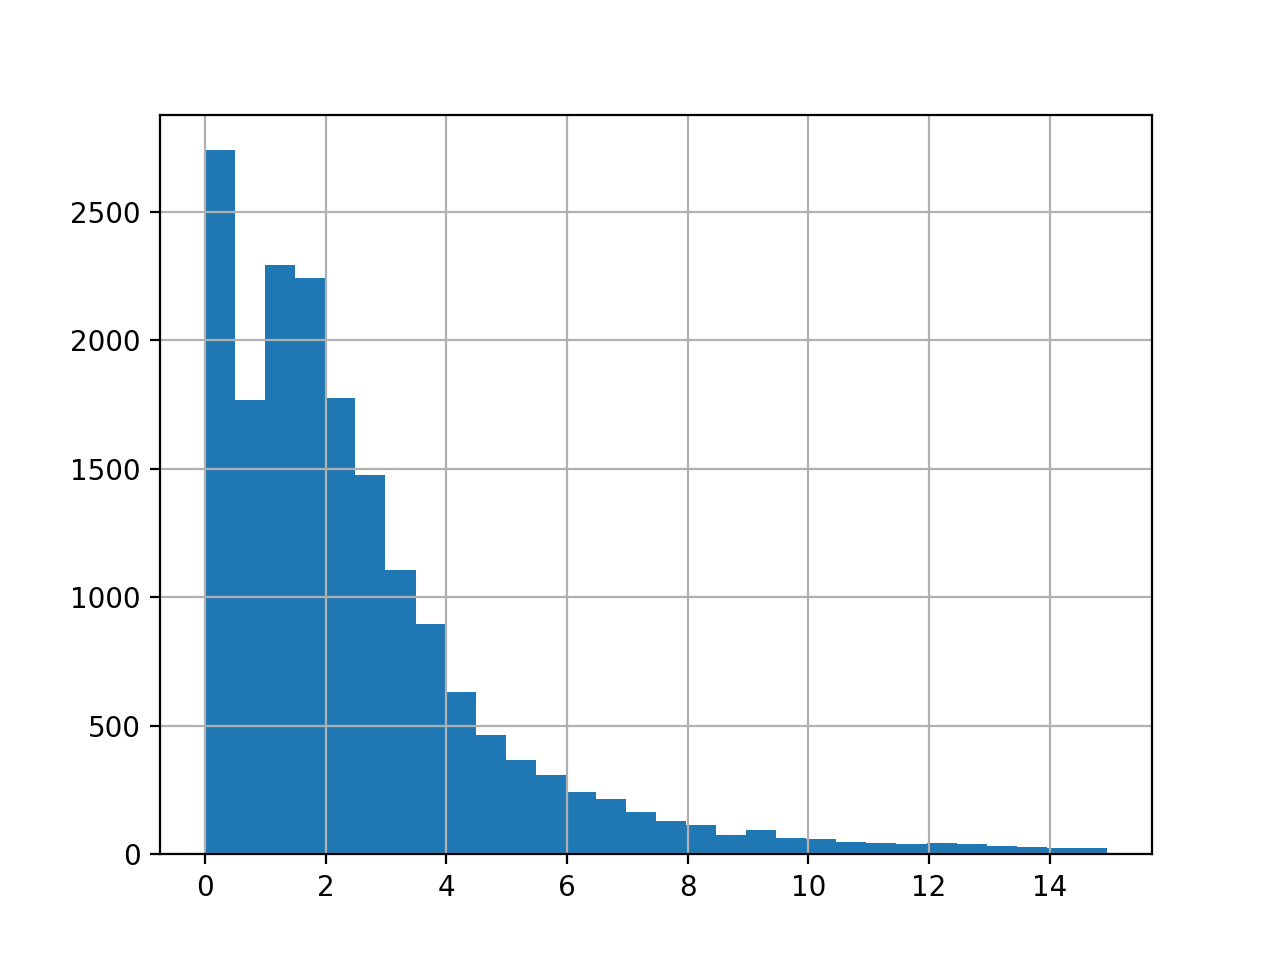

<AxesSubplot:>

In [80]:
#Histogram of nutrition adequancy if only consider purchase
%matplotlib notebook
nutrient_ratio['Energy'].loc[:, nutrient_ratio['Energy'] <= 15].hist(bins=30)

In [44]:
units = consumption_ownprod.loc[:, 'u'].unique()

In [68]:
#Convert units to FDC units
consumption1.iloc[consumption1.index.get_level_values('u') == units[0]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[0]]*10
consumption1.iloc[consumption1.index.get_level_values('u') == units[1]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[1]]*10
consumption1.iloc[consumption1.index.get_level_values('u') == units[2]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[2]]/100
consumption1.iloc[consumption1.index.get_level_values('u') == units[3]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[3]]*100
consumption1.iloc[consumption1.index.get_level_values('u') == units[4]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[4]]*100
consumption1.iloc[consumption1.index.get_level_values('u') == units[5]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[5]]*50
consumption1.iloc[consumption1.index.get_level_values('u') == units[6]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[6]]*200
consumption1.iloc[consumption1.index.get_level_values('u') == units[7]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[7]]*30
consumption1.iloc[consumption1.index.get_level_values('u') == units[8]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[8]]*250
consumption1.iloc[consumption1.index.get_level_values('u') == units[9]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[9]]*80
consumption1.iloc[consumption1.index.get_level_values('u') == units[10]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[10]]*80
consumption1.iloc[consumption1.index.get_level_values('u') == units[11]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[11]]/100
consumption1.iloc[consumption1.index.get_level_values('u') == units[12]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[12]]*150
consumption1.iloc[consumption1.index.get_level_values('u') == units[13]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[13]]*600
#Missing data: 15kg for Bundle of Millet, G/corn, Sugarcane, Vegetable etc: Small
consumption1.iloc[consumption1.index.get_level_values('u') == units[14]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[14]]*150
#Missing data: 15kg for Bundle of Millet, G/corn, Sugarcane, Vegetable etc: Medium
consumption1.iloc[consumption1.index.get_level_values('u') == units[15]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[15]]*250
consumption1.iloc[consumption1.index.get_level_values('u') == units[16]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[16]]*250
consumption1.iloc[consumption1.index.get_level_values('u') == units[17]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[17]]*300
consumption1.iloc[consumption1.index.get_level_values('u') == units[18]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[18]]*50
consumption1.iloc[consumption1.index.get_level_values('u') == units[19]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[19]]*1200
consumption1.iloc[consumption1.index.get_level_values('u') == units[20]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[20]]*500
consumption1.iloc[consumption1.index.get_level_values('u') == units[21]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[21]]*150
consumption1.iloc[consumption1.index.get_level_values('u') == units[22]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[22]]*400
consumption1.iloc[consumption1.index.get_level_values('u') == units[23]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[23]]*750
consumption1.iloc[consumption1.index.get_level_values('u') == units[24]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[24]]*500
consumption1.iloc[consumption1.index.get_level_values('u') == units[25]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[25]]*200
consumption1.iloc[consumption1.index.get_level_values('u') == units[26]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[26]]*400
consumption1.iloc[consumption1.index.get_level_values('u') == units[27]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[27]]/100
consumption1.iloc[consumption1.index.get_level_values('u') == units[28]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[28]]/100
consumption1.iloc[consumption1.index.get_level_values('u') == units[29]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[29]]*10
consumption1.iloc[consumption1.index.get_level_values('u') == units[30]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[30]]*10
consumption1.iloc[consumption1.index.get_level_values('u') == units[31]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[31]]*10
consumption1.iloc[consumption1.index.get_level_values('u') == units[32]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[32]]*250
consumption1.iloc[consumption1.index.get_level_values('u') == units[33]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[33]]*0.01
consumption1.iloc[consumption1.index.get_level_values('u') == units[34]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[34]]/100
consumption1.iloc[consumption1.index.get_level_values('u') == units[35]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[35]]/100

In [71]:
#Consumption from own production for each household all in FDC units
consumption1 = consumption1.groupby('i').sum()
consumption1 = consumption1.loc[1:,food_list]
consumption1

,"(Cocoyam, Spinach, etc)",Agricultural eggs,Bananas,Beef,Bread,Brown beans,Cassava flour,Chicken,Chocolate drinks,"Condiments,(salt,spices,pepper, etc)",...,Sachet water,"Soft drinks (Coca cola, spirit etc)",Sugar,Sweet Potatoes,Tea,Tomato puree(canned),Tomatoes,Wheat flour,White beans,Yam-roots
i,,,,,,,,,,,,,,,,,,,,,
10001.0,0.0,0.0,10.0,20.0,8.0,0.0,0.0,30.0,2.25,0.0,...,0.0,1.4,0.0000,0.0,0.00,2.1,2.4,0.0,0.0,98.999996
10002.0,0.0,0.0,13.0,14.0,4.0,0.0,0.0,45.0,2.25,0.0,...,1.8,2.1,0.0000,0.0,0.00,2.1,4.8,0.0,0.0,111.999998
10003.0,0.0,0.0,6.0,30.0,8.0,0.0,0.0,30.0,0.00,0.0,...,0.0,0.7,0.1665,0.0,0.66,4.9,10.0,0.0,0.0,33.000000
10004.0,0.0,0.0,5.0,30.0,8.0,0.0,0.0,30.0,0.00,0.0,...,0.0,0.7,0.1665,0.0,0.44,4.2,10.0,0.0,0.0,33.000000
10005.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,10.0,0.00,0.0,...,0.0,0.0,0.0000,0.0,0.00,2.1,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0000,0.0,0.00,0.0,0.0,0.0,0.0,0.000000
379148.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0000,0.0,0.00,0.0,0.0,0.0,0.0,0.000000
379151.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0000,0.0,0.00,0.0,0.0,0.0,0.0,0.000000


In [73]:
nutri_prod = consumption1@nutrition_chart.T
nutri_prod

,Alanine,"Alcohol, ethyl",Amino acids,Arginine,Ash,Aspartic acid,Betaine,"Boron, B",Caffeine,"Calcium, Ca",...,"Vitamin D (D2 + D3), International Units",Vitamin D3 (cholecalciferol),Vitamin E (alpha-tocopherol),"Vitamin E, added",Vitamin K (Dihydrophylloquinone),Vitamin K (Menaquinone-4),Vitamin K (phylloquinone),Vitamins and Other Components,Water,"Zinc, Zn"
i,,,,,,,,,,,,,,,,,,,,,
10001.0,36.3828,5.082,0.0,54.3930,144.929997,64.866599,231.42,0.0,19.35,8701.129932,...,0.0,0.0,7985.549999,0.0,0.0,0.0,3391.654964,0.0,16457.025673,202.871099
10002.0,52.0668,10.164,0.0,72.9640,164.739998,91.121600,346.92,0.0,25.65,8315.959969,...,0.0,0.0,8002.278999,0.0,0.0,0.0,3458.974968,0.0,20102.377311,206.137199
10003.0,33.5859,5.082,0.0,39.8393,98.235664,58.227600,231.98,0.0,6.30,7492.966450,...,268.6,6.8,4040.805750,0.0,0.0,0.0,2250.832471,0.0,14687.983148,215.295015
10004.0,33.6770,10.164,0.0,39.9594,98.989664,58.493400,231.84,0.0,6.30,6779.906450,...,268.6,6.8,4038.860500,0.0,0.0,0.0,1881.564984,0.0,13954.417161,208.858365
10005.0,10.9032,5.082,0.0,12.2754,19.488000,18.540800,77.42,0.0,0.00,1259.080000,...,268.6,6.8,3962.287000,0.0,0.0,0.0,1119.640000,0.0,1872.768000,62.072600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379146.0,0.0000,0.000,0.0,0.0000,0.000000,0.000000,0.00,0.0,0.00,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
379148.0,0.0000,0.000,0.0,0.0000,0.000000,0.000000,0.00,0.0,0.00,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
379151.0,0.0000,0.000,0.0,0.0000,0.000000,0.000000,0.00,0.0,0.00,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000


In [76]:
nutri_total = nutri_prod.append(nutri).groupby('i').sum()

nutrient_ratio_total = (nutri_total[use]/hh_rwi[use]).dropna()

nutrient_ratio_total

/tmp/ipykernel_183/272752089.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nutri_total = nutri_prod.append(nutri).groupby('i').sum()


,,,Energy,Niacin,Protein,Riboflavin,Thiamin,Vitamin B-12,Vitamin B-6
i,t,m,,,,,,,
10001.0,2010,Nigeria,20.359904,2.403113,3.357977,1.564386,2.011693,3.167585,4.799754
10002.0,2010,Nigeria,16.509015,2.377627,2.880176,1.534376,1.686826,3.539220,4.388180
10003.0,2010,Nigeria,11.512363,2.219012,2.904035,1.405317,1.376215,4.801545,3.128520
10004.0,2010,Nigeria,22.406315,3.683606,4.339695,2.318521,2.317384,7.064667,4.580085
10006.0,2010,Nigeria,4.374507,1.916148,2.460249,1.324622,2.029437,4.792444,3.571700
...,...,...,...,...,...,...,...,...,...
379146.0,2018,Nigeria,0.541463,0.086406,0.137517,0.140000,0.033435,0.168155,0.000000
379148.0,2018,Nigeria,0.073512,0.192187,0.222449,0.082967,0.025595,0.639881,0.180220
379151.0,2018,Nigeria,2.816460,0.000000,0.156085,0.000000,0.000000,0.000000,0.000000


<IPython.core.display.Javascript object>


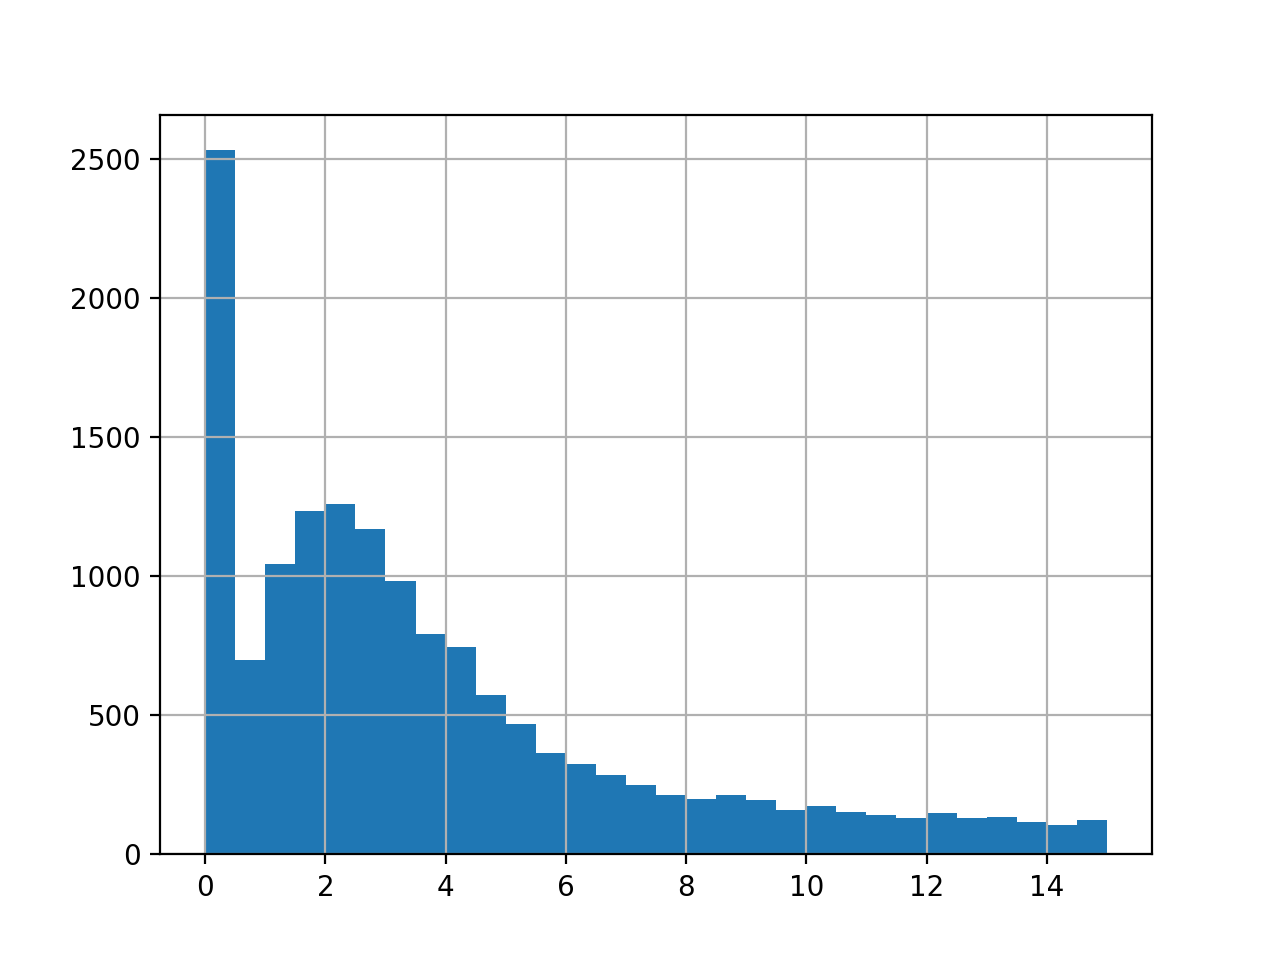

<AxesSubplot:>

In [79]:
#Histogram of nutrition adequancy if consider both purchase and own production
%matplotlib notebook
nutrient_ratio_total['Energy'].loc[:, nutrient_ratio_total['Energy'] <= 15].hist(bins=30)

### Factors affecting food demand

In [ ]:
!pip install wbdata
import wbdata
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import cufflinks as cf
import seaborn as sns
import matplotlib.pyplot as plt
cf.go_offline()

In [ ]:
def indicators_df(code,name):
    variable_labels = {code:name}
    NGA = wbdata.get_dataframe(variable_labels, country="NGA").sort_values('date')

    return NGA

def plot_indicators(code,name):
    world = indicators_df(code,name)

    date = np.asarray(world['date'].values, float)
    nga = world.values

    plt.figure(figsize=(14,9))
    plt.plot(date,nga)
    plt.title(name,fontweight="bold")
    plt.xlabel("Date")
    plt.ylabel("Variable")
    plt.ylim(ymin=0)

In [ ]:
code = "NY.GNP.PCAP.CD"
name = "GNI per capita"
world = indicators_df(code,name)
world

In [ ]:
plt.figure(figsize=(15,9))
plt.plot(world)
plt.title(name,fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Variable")
plt.xticks(world.index, rotation='vertical')
plt.show()